# Exploración de datos

In [1]:
import sys
import os
from functools import reduce

project_path = os.path.abspath('..')
sys.path.insert(1, project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

from src.utils import get_project_root
from src.data.make_dataset import get_minma_data

## Datos meteorológicos

### Carga de datos 

In [44]:
meteo_df = pd.read_excel(get_project_root() / 'data' / 'raw' / 'Torre Meteo Codelco Ventanas.xlsx').set_index('date')

In [11]:
meteo_df.head()

T_10     T_20     T_40     WD_10    WD_20     WD_40  \
date                                                                          
2017-01-01 01:00:00  13.2985  14.1978  13.5753   94.0280  81.7518   96.7583   
2017-01-01 02:00:00  12.9392  13.8758  13.3057  103.8880  94.4246  103.8760   
2017-01-01 03:00:00  12.0163  13.1585  12.5690   95.5741  84.8955   65.9050   
2017-01-01 04:00:00  11.9218  13.2260  12.8148  102.9850  84.7760   59.5587   
2017-01-01 05:00:00  11.7738  12.8745  12.5707  100.4430  86.7762   60.7194   

                       WS_10    WS_20    WS_40  SigDir_10  SigDir_20  \
date                                                                   
2017-01-01 01:00:00  1.76519  1.80790  1.40731   13.07000   10.25000   
2017-01-01 02:00:00  1.51830  1.41059  0.49382   12.07000    7.97300   
2017-01-01 03:00:00  1.87600  2.15907  2.64079    7.83200    7.87900   
2017-01-01 04:00:00  1.60665  1.85206  2.19641   15.76000    9.32001   
2017-01-01 05:00:00  1.81735  2.07465  1.84073    9.28999    7.57100   

                     SigDir_40    HR_10    HR_20    HR_40     P_20  
date                                                                
2017-01-01 01:00:00      34.05  84.1866  83.0933  77.9619  1010.00  
2017-01-01 02:00:00      49.55  84.5200  83.8250  78.3682  1009.28  
2017-01-01 03:00:00      18.19  86.6300  85.7184  81.5400  1008.93  
2017-01-01 04:00:00      16.45  87.2234  86.1250  81.9850  1008.60  
2017-01-01 05:00:00      17.44  87.9434  87.3833  82.8850  1008.83

In [12]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50298 entries, 2017-01-01 01:00:00 to 2022-09-27 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   T_10       49422 non-null  float64
 1   T_20       49452 non-null  float64
 2   T_40       49320 non-null  float64
 3   WD_10      49261 non-null  float64
 4   WD_20      49475 non-null  float64
 5   WD_40      49248 non-null  float64
 6   WS_10      49261 non-null  float64
 7   WS_20      49475 non-null  float64
 8   WS_40      49248 non-null  float64
 9   SigDir_10  49533 non-null  float64
 10  SigDir_20  49533 non-null  float64
 11  SigDir_40  49533 non-null  float64
 12  HR_10      49414 non-null  float64
 13  HR_20      45897 non-null  float64
 14  HR_40      49481 non-null  float64
 15  P_20       49352 non-null  float64
dtypes: float64(16)
memory usage: 6.5 MB


### Visualización inicial

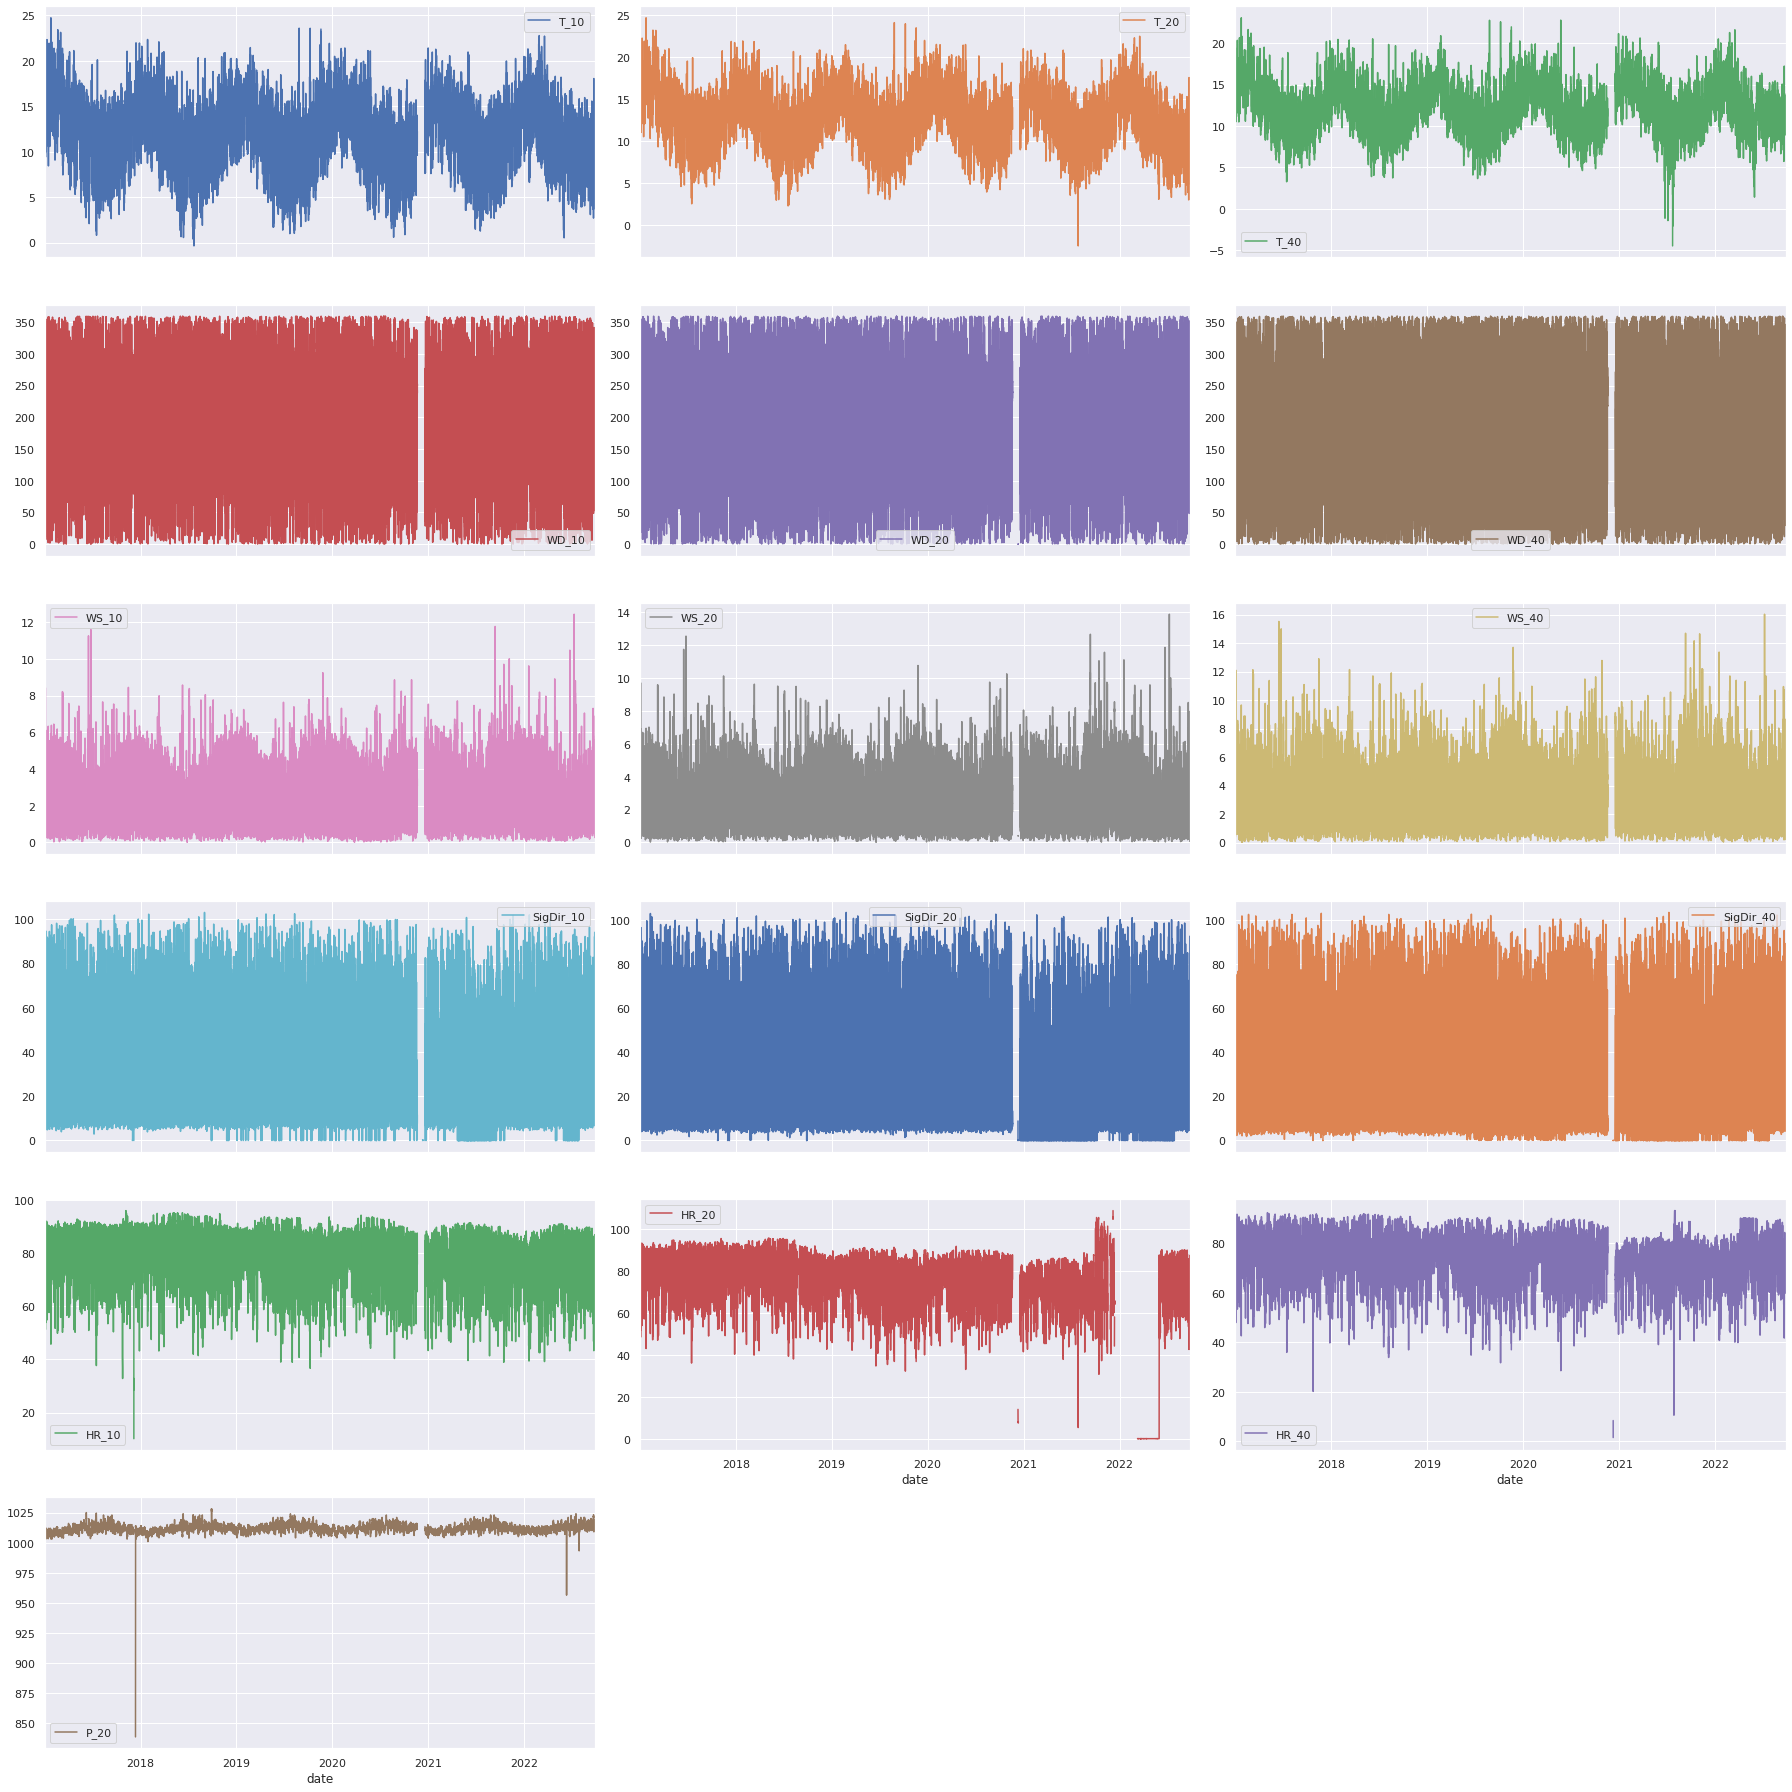

In [32]:
meteo_df.plot(figsize=(25,25),subplots=True, layout=(6,3))
plt.tight_layout()
plt.show()

- CEMS U1 Ventanas con datos desde 10-02-2020 hasta 16-08-2021
- CEMS Chimenea Codelco con datos desde enero 2021

Omitir U1 Ventanas y solo ocupar la ventana de tiempo de la Chimenea Codelco? O al revés?

### Datos nulos

In [20]:
meteo_df.isna().sum()

T_10          876
T_20          846
T_40          978
WD_10        1037
WD_20         823
WD_40        1050
WS_10        1037
WS_20         823
WS_40        1050
SigDir_10     765
SigDir_20     765
SigDir_40     765
HR_10         884
HR_20        4401
HR_40         817
P_20          946
dtype: int64

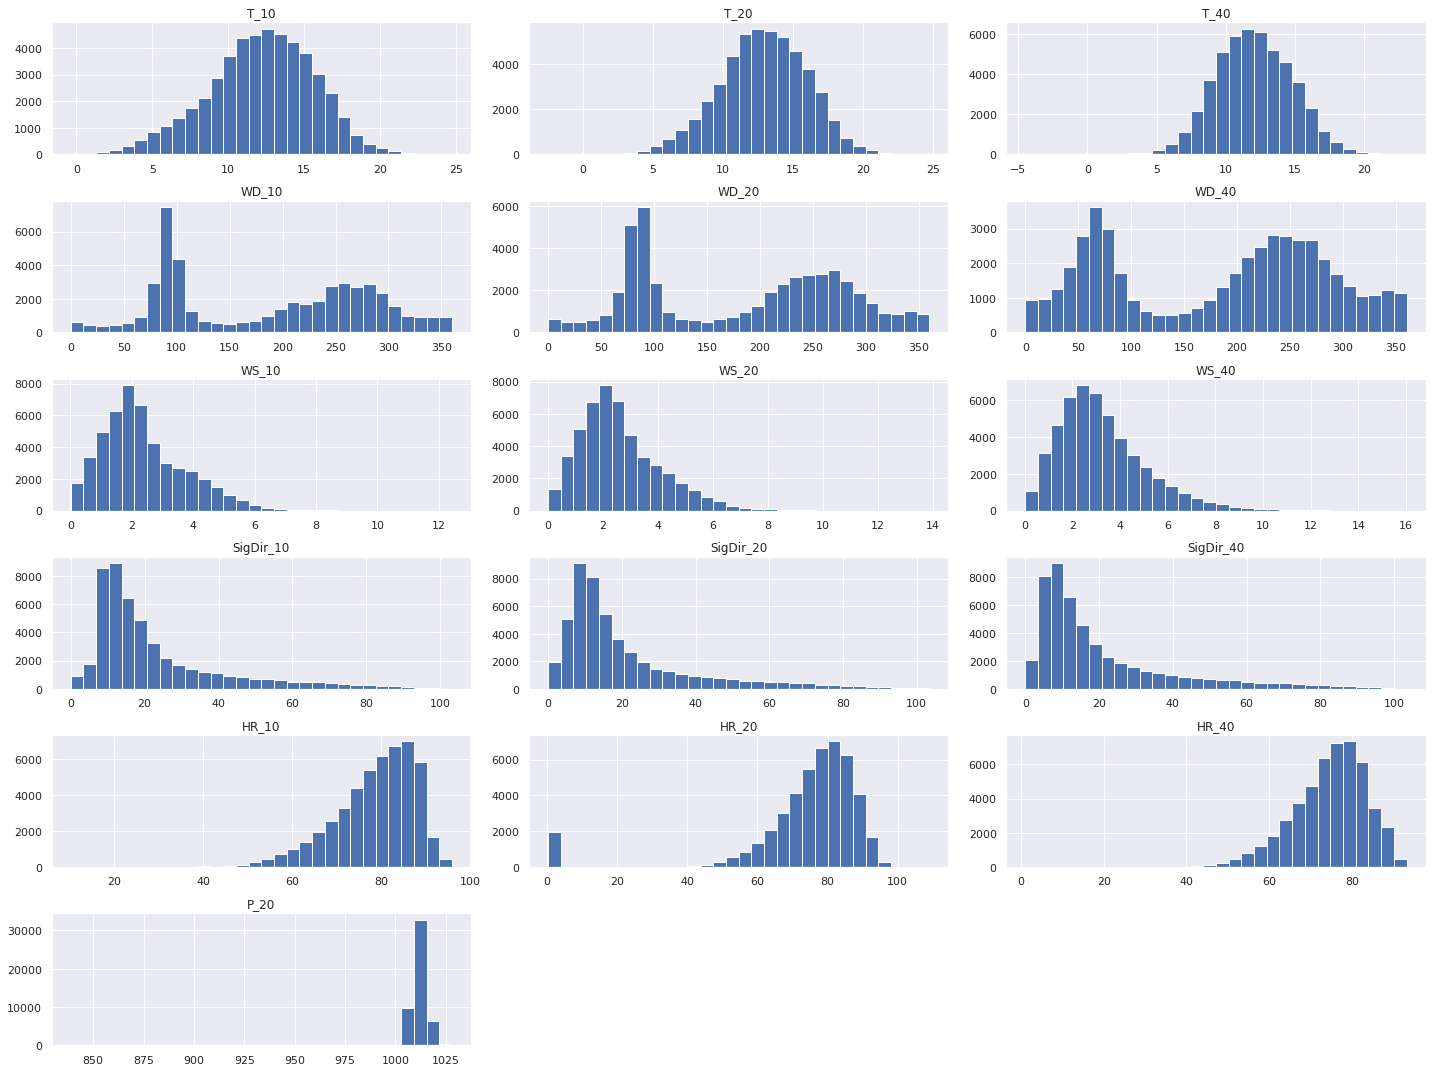

In [28]:
meteo_df.hist(figsize=(20,15), bins=30, layout=(6,3))
plt.tight_layout()
plt.show()

### Resumen estadístico

In [33]:
meteo_df.describe()

T_10          T_20          T_40         WD_10         WD_20  \
count  49422.000000  49452.000000  49320.000000  49261.000000  49475.000000   
mean      12.168496     12.868626     12.034148    185.873030    182.788780   
std        3.482076      3.075376      2.742432     93.905781     94.910287   
min       -0.361983     -2.484530     -4.491250      0.006314      0.000017   
25%        9.968373     10.846000     10.099275     93.613200     87.918650   
50%       12.357600     12.923300     11.964450    202.174000    204.362000   
75%       14.658750     15.077350     13.961500    268.163000    263.905500   
max       24.737800     24.704800     23.071800    359.995000    359.998000   

              WD_40         WS_10         WS_20         WS_40     SigDir_10  \
count  49248.000000  49261.000000  49475.000000  49248.000000  49533.000000   
mean     181.783896      2.376006      2.624565      3.241442     22.870336   
std      101.620480      1.363919      1.476153      1.849531     18.339604   
min        0.007607      0.010144      0.012034      0.026629      0.000000   
25%       74.849425      1.411540      1.587160      1.924070     10.720000   
50%      207.862000      2.100590      2.350390      2.904655     16.150000   
75%      264.219000      3.145330      3.412580      4.203235     28.160000   
max      359.994000     12.428200     13.881300     16.022400    103.200000   

          SigDir_20     SigDir_40         HR_10         HR_20         HR_40  \
count  49533.000000  49533.000000  49414.000000  45897.000000  49481.000000   
mean      21.055178     20.819240     78.600427     73.962099     74.603799   
std       18.827131     19.566716      9.098981     18.247236      8.977901   
min        0.000000      0.000000     10.182800      0.317567      1.041790   
25%        8.830000      7.747000     73.417625     70.271000     69.341700   
50%       14.010000     13.230000     80.261700     78.088300     75.765100   
75%       25.990000     26.740000     85.594600     84.041700     80.978800   
max      103.400000    103.400000     95.978300    108.991000     93.215000   

               P_20  
count  49352.000000  
mean    1012.024566  
std        3.277233  
min      838.845000  
25%     1010.000000  
50%     1012.000000  
75%     1014.000000  
max     1028.130000

### Lag plots

#### 1 hora

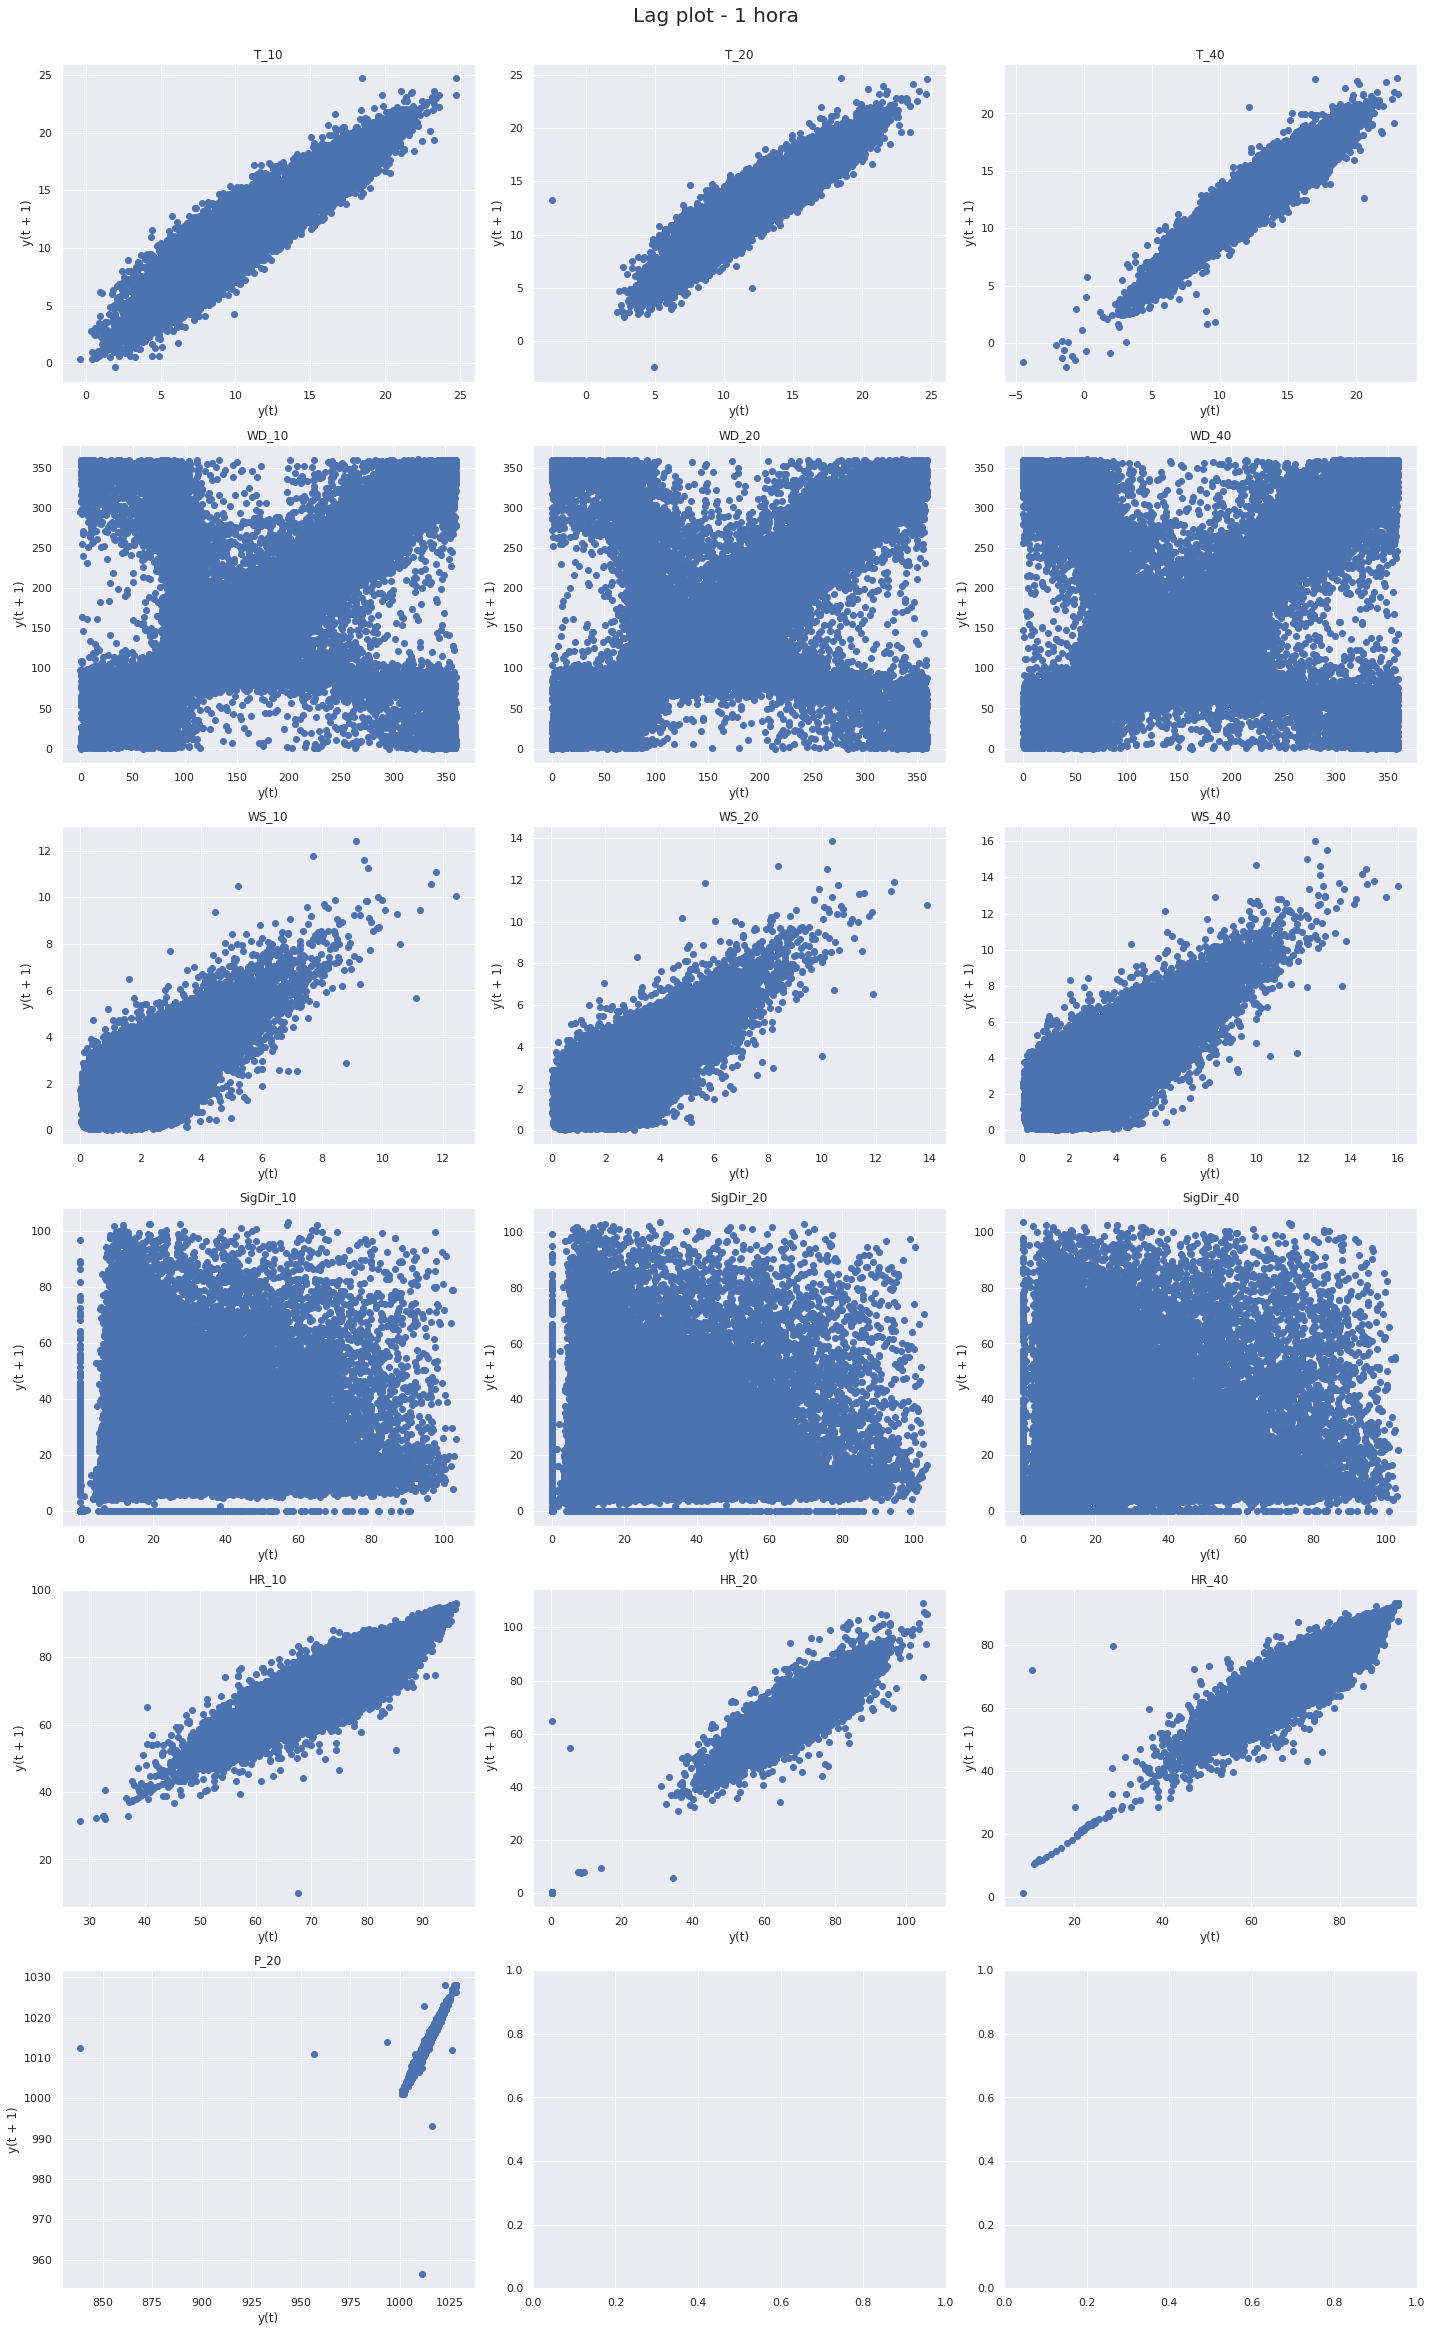

In [132]:
fig, ax = plt.subplots(6, 3, figsize=(20,33))

for idx, col in enumerate(meteo_df.columns):
    pd.plotting.lag_plot(meteo_df[col], lag=1, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 hora', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### 1 día

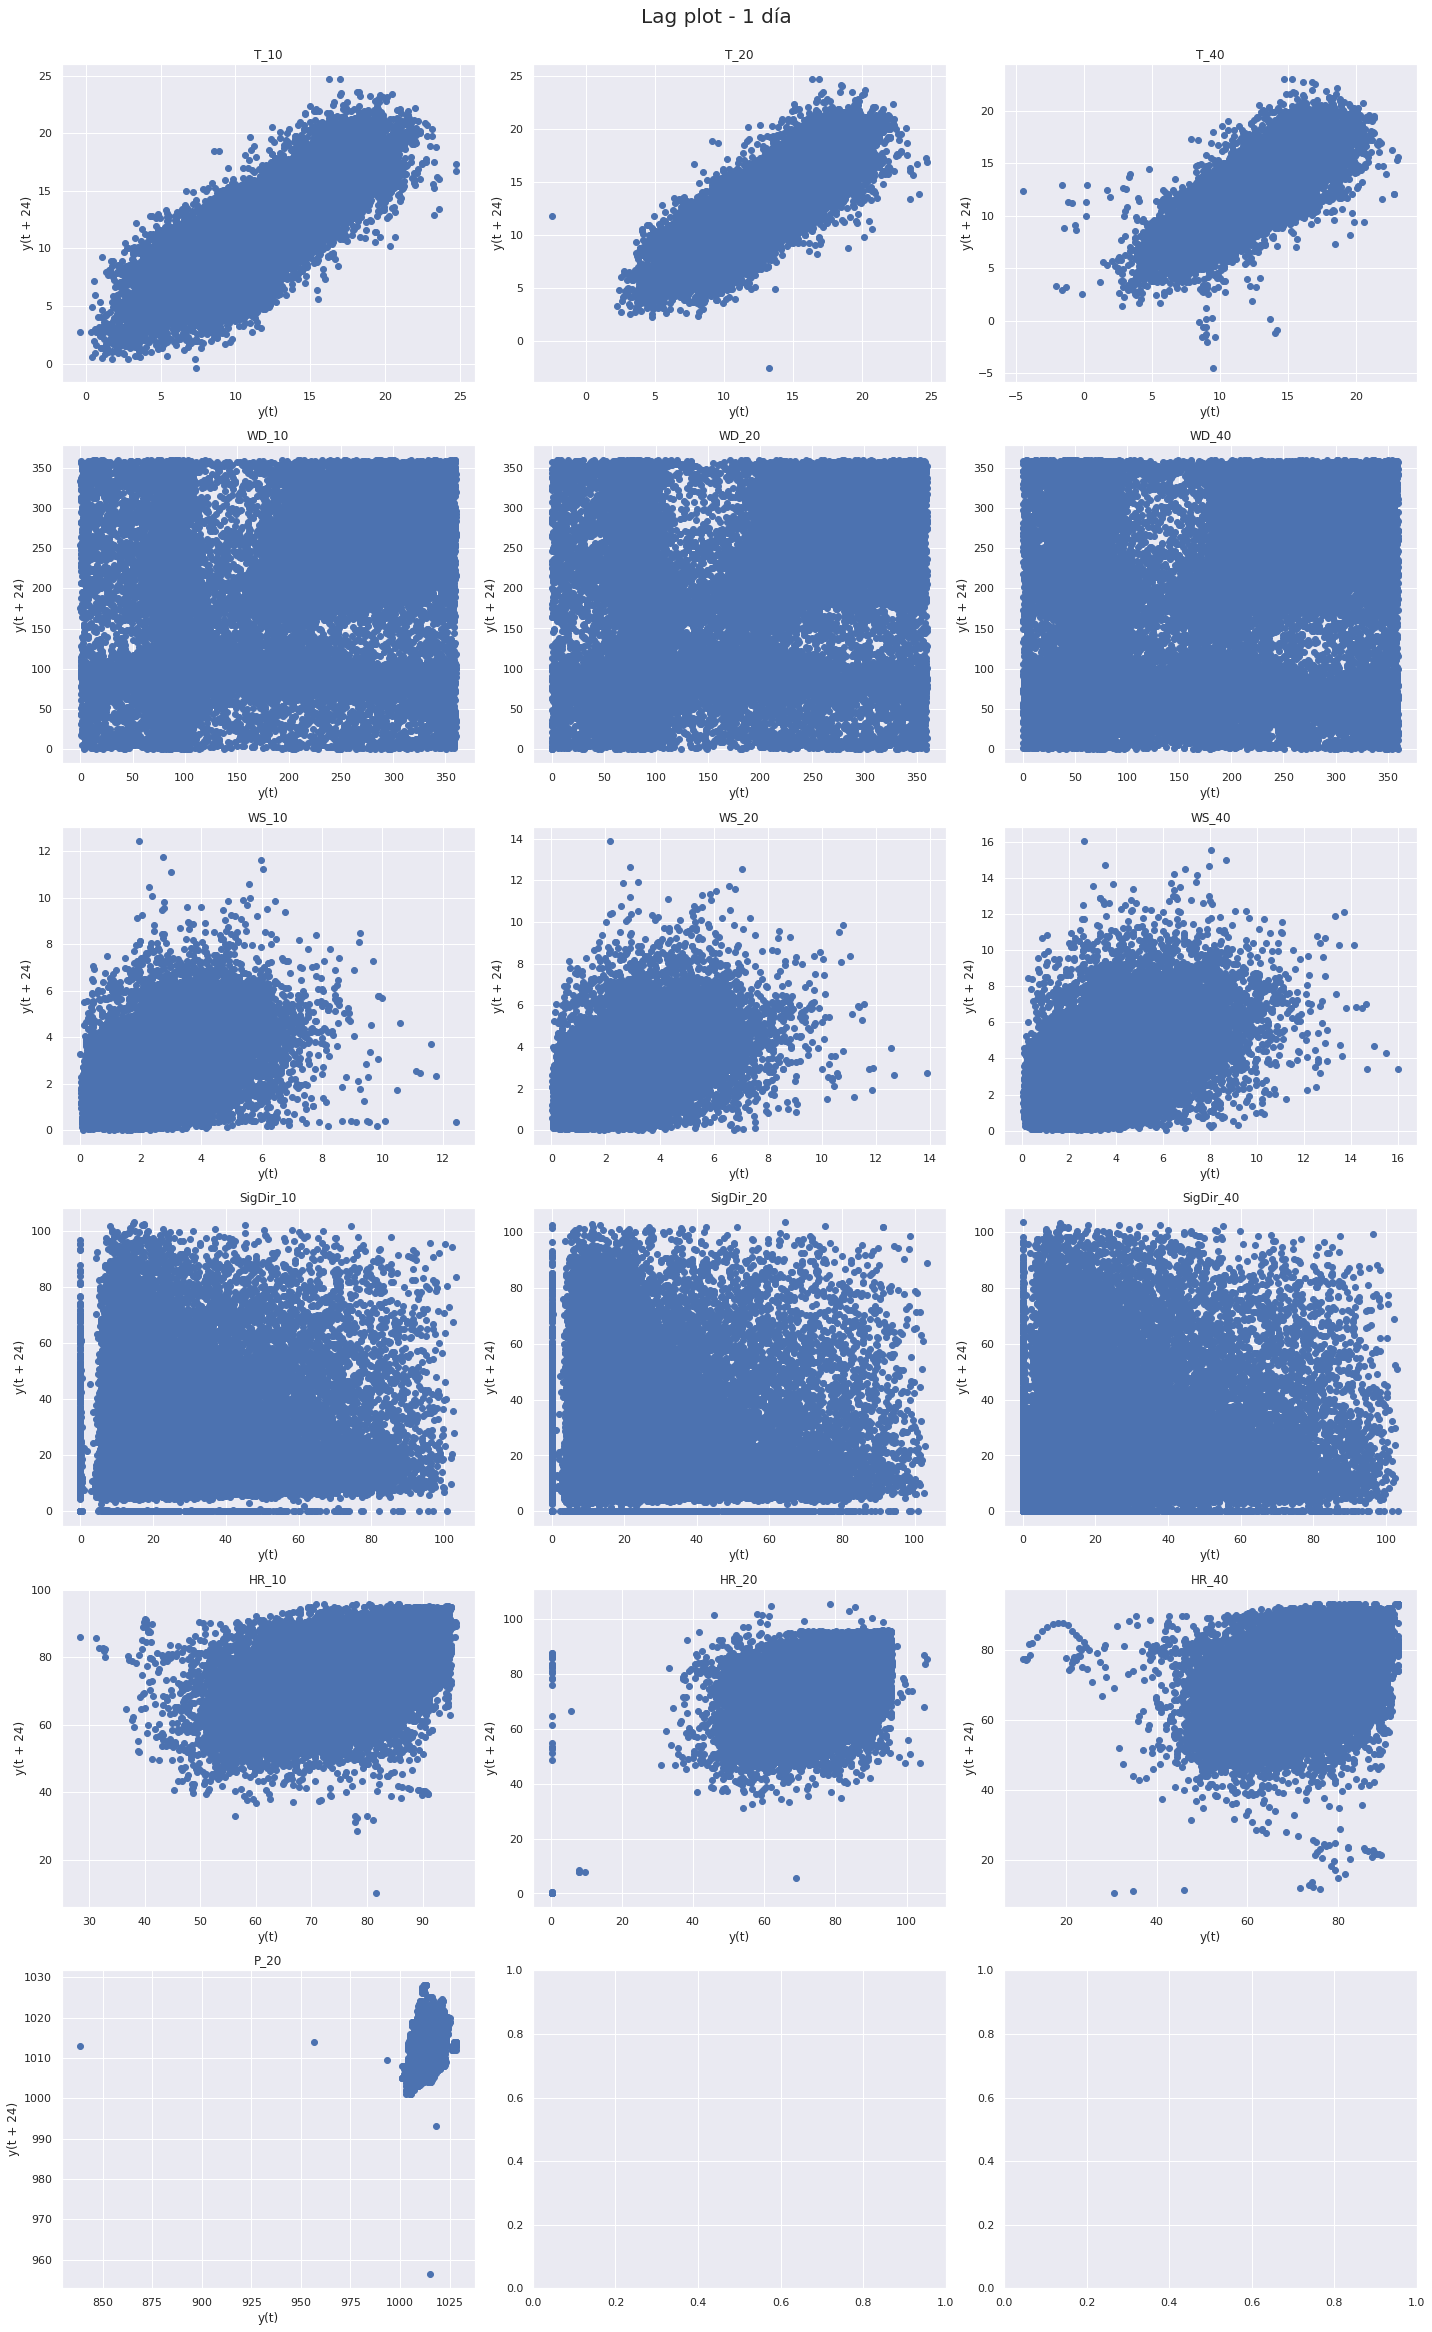

In [149]:
fig, ax = plt.subplots(6, 3, figsize=(20,33))

for idx, col in enumerate(meteo_df.columns):
    pd.plotting.lag_plot(meteo_df[col], lag=24, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(col)

fig.suptitle('Lag plot - 1 día', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Correlación entre variables

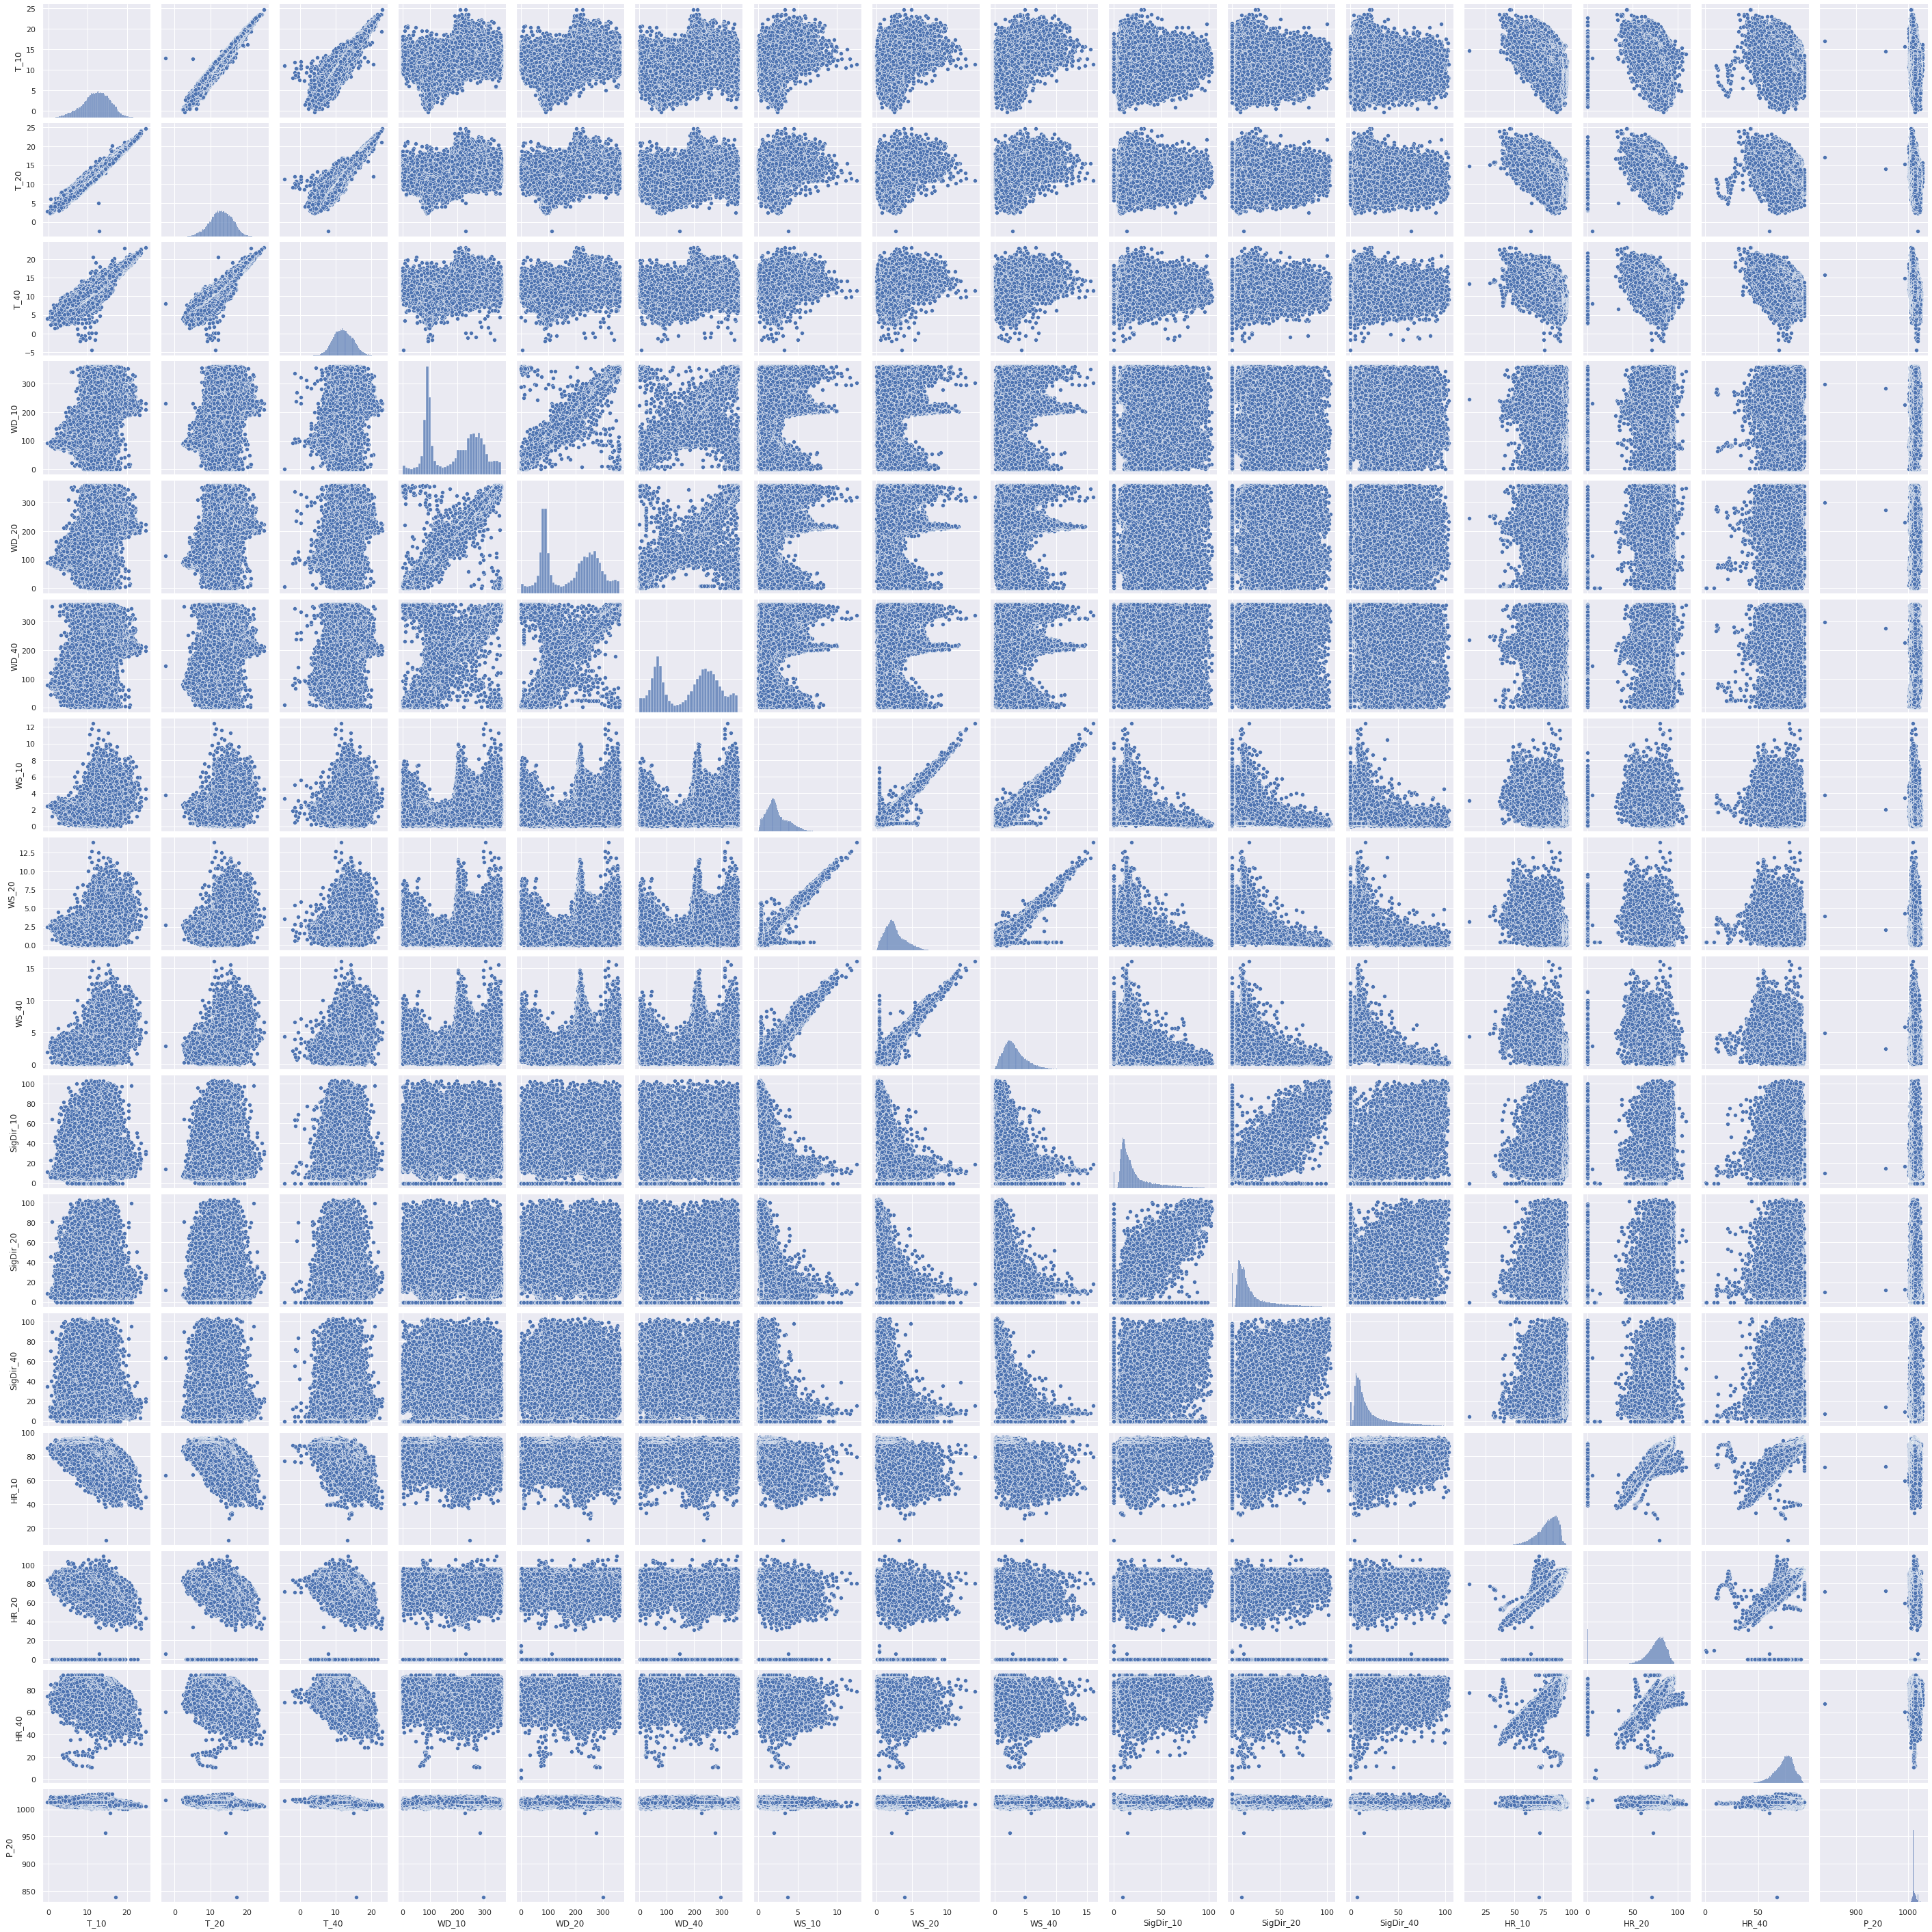

In [84]:
sns.pairplot(meteo_df)
plt.show()

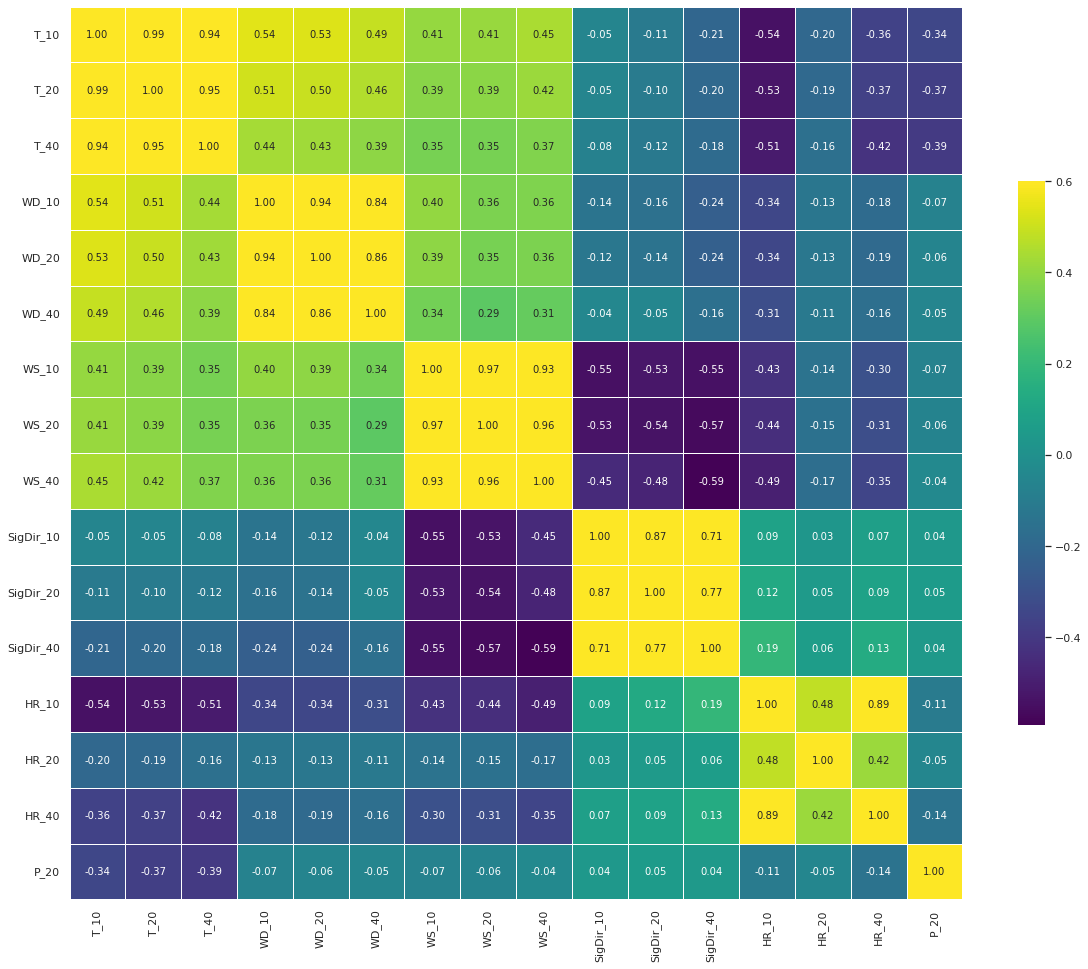

In [83]:
meteo_corr = meteo_df.corr(method='pearson')

g = sns.heatmap(meteo_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='viridis')
g.figure.set_size_inches(20,20)
    
plt.show()

### Autocorrelación

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

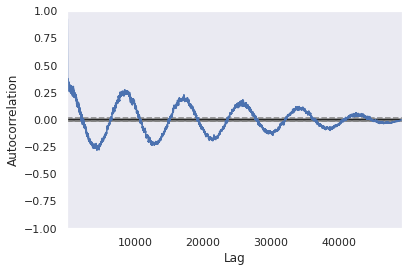

In [148]:
pd.plotting.autocorrelation_plot(meteo_df.iloc[:,15].dropna())

### Prueba 

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))

for year in ['2017', '2018', '2019', '2020', '2021', '2022']:
    year_df = meteo_df.loc[year, 'T_10'].copy()
    year_df = year_df.resample('w').mean()
    year_df.index = year_df.index.strftime('%m-%d')
    year_df.resample('M').mean().plot(ax=ax)

plt.tight_layout()
plt.show()

ax.text(
    x_end, 
    y_end, 
    text, 
    color=color, 
    fontsize=14, 
    weight="bold", 
    fontfamily="Montserrat", 
    va="center"
)